## Descarga de datos de 47 Tucanae

In [66]:
%load_ext autoreload
%autoreload 2


#@markdown ### Librerías y funciones auxiliares
import sys
import os
    
# Añadir el directorio raíz del proyecto al sys.path
project_path = os.path.abspath(os.path.join(os.getcwd(), "../../src"))  # Subir un nivel
if project_path not in sys.path:
    sys.path.append(project_path)
            

from hyper_velocity_stars_detection.sources.source import AstroMetricData
from hyper_velocity_stars_detection.globular_clusters import GlobularClusterAnalysis

PATH = "../../data/report"

RADIUS_SCALE = 1
CATALOG = "gaiadr3"
FILTERS = {"ast_params_solved": 3, "ruwe": 1.4, "v_periods_used": 10}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
CLUSTER_NAME = "ngc 104"

CACHE = True
gc_object = None

if CACHE:
    file = os.path.join(PATH, "globular_cluster_NGC_104.zip")
    try:
        gc_object = GlobularClusterAnalysis.load(file)
    except FileNotFoundError:
        print("No se ha encontrado el archivo % s" % file)

if not CACHE:
    gc_object =  GlobularClusterAnalysis.load_globular_cluster(
        name=CLUSTER_NAME,
        radius_scale=RADIUS_SCALE,
        catalog_name=CATALOG,
        **FILTERS
    )

print(str(gc_object))

Muestras seleccionadas del objeto astronómico ngc 104 con radio 1:
	 - df_c1 - Todas las estrellas seleccionadas: 132216.
	 - df_c2 - Las estrellas con errores de paralaje y pm menores al 10%: 17199.
	 - df_c3 - Las estrellas con un error de paralaje menor del 30% y de pm menores al 10%: 17199.
	 - df_c4 - Las estrellas con un error de paralaje menor del 10% y de pm menores al 20%.: 25125.
Se han encontrado 37 fuentes de rayos X.



(<Figure size 1500x600 with 1 Axes>,
 <Axes: title={'center': 'CMD NGC_104'}, xlabel='bp_rp', ylabel='phot_g_mean_mag'>)

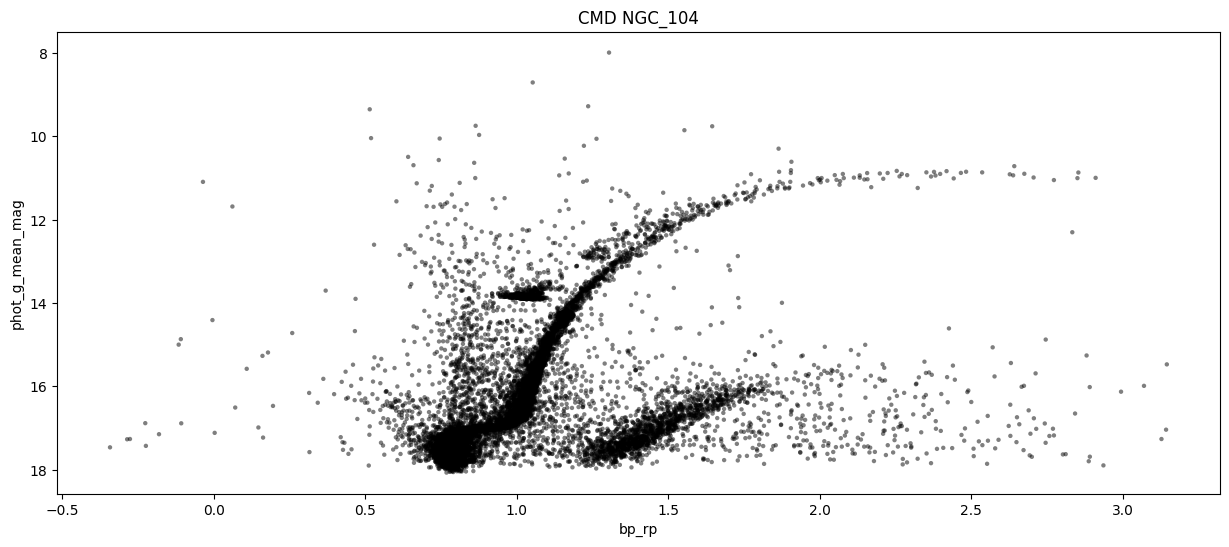

In [29]:
gc_object.plot_cmd("df_c2")

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Cluster NGC_104'}, xlabel='l (Galactic Longitude)', ylabel='b (Galactic Latitude)'>)

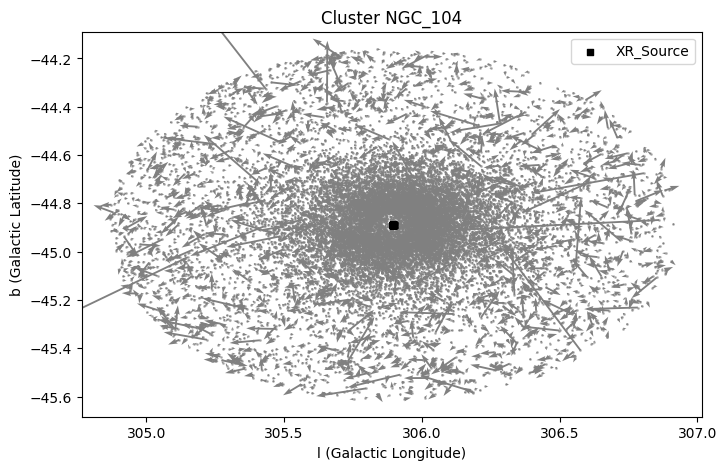

In [30]:
gc_object.plot_cluster("df_c2")

## Clustering Methods

In [31]:
gc_object.cluster_star_detection(sample_label="df_c2", group_labels=True)

[I 2025-08-31 12:06:10,852] A new study created in memory with name: no-name-7ccfcae3-f0a2-4374-a006-549dae967e2d
[I 2025-08-31 12:06:12,810] Trial 0 finished with value: 0.0651508378117589 and parameters: {'params_distribution': 'hdbscan', 'hdbscan_min_cluster_size': 78, 'hdbscan_min_samples': 3, 'hdbscan_scaler_method': 'standard', 'hdbscan_noise_method': None}. Best is trial 0 with value: 0.0651508378117589.
[I 2025-08-31 12:06:16,284] Trial 1 finished with value: 0.1734739837465741 and parameters: {'params_distribution': 'dbscan', 'dbscan_eps': 0.8315058286579915, 'dbscan_min_samples': 10, 'dbscan_scaler_method': 'standard', 'dbscan_noise_method': None}. Best is trial 0 with value: 0.0651508378117589.
[I 2025-08-31 12:06:18,556] Trial 2 finished with value: 0.024237806415738625 and parameters: {'params_distribution': 'hdbscan', 'hdbscan_min_cluster_size': 22, 'hdbscan_min_samples': 8, 'hdbscan_scaler_method': 'standard', 'hdbscan_noise_method': None}. Best is trial 2 with value: 0.

ClusteringResults(df_stars=               solution_id                   DESIGNATION            SOURCE_ID  \
0      1636148068921376768  Gaia DR3 4688774672735704320  4688774672735704320   
1      1636148068921376768  Gaia DR3 4688774672735707008  4688774672735707008   
2      1636148068921376768  Gaia DR3 4688774810174662400  4688774810174662400   
3      1636148068921376768  Gaia DR3 4688774844534402688  4688774844534402688   
4      1636148068921376768  Gaia DR3 4688774913253874432  4688774913253874432   
...                    ...                           ...                  ...   
16493  1636148068921376768  Gaia DR3 4689629951064228224  4689629951064228224   
16494  1636148068921376768  Gaia DR3 4689629951065933696  4689629951065933696   
16495  1636148068921376768  Gaia DR3 4689629955354128000  4689629955354128000   
16496  1636148068921376768  Gaia DR3 4689629955354131968  4689629955354131968   
16497  1636148068921376768  Gaia DR3 4689629955354145408  4689629955354145408   



(<Figure size 1500x600 with 1 Axes>,
 <Axes: title={'center': 'CMD NGC_104'}, xlabel='bp_rp', ylabel='phot_g_mean_mag'>)

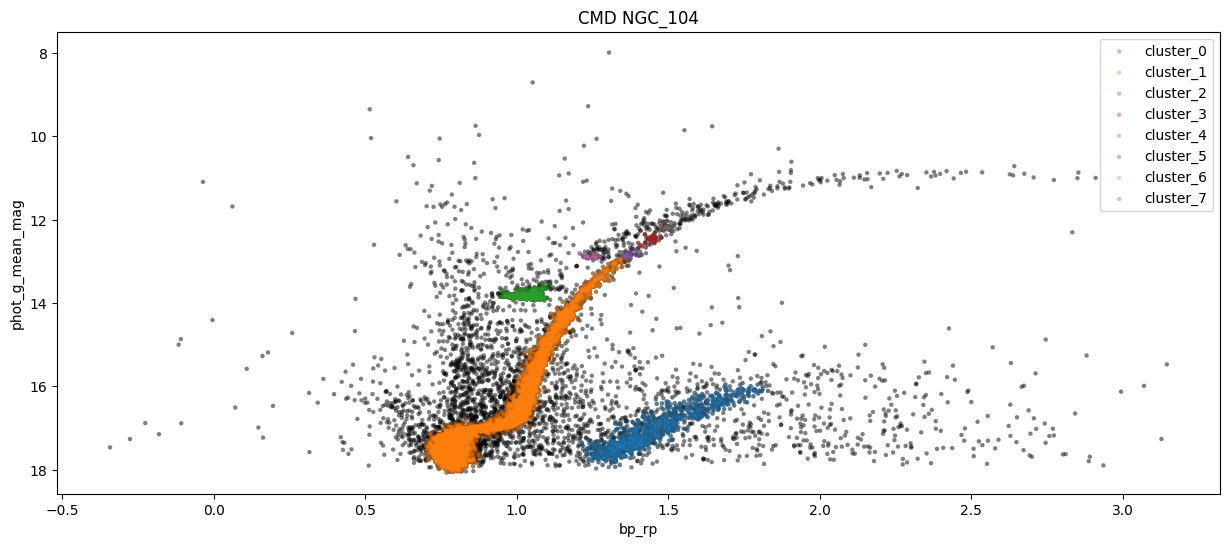

In [52]:
gc_object.plot_cmd(legend=True)

In [51]:
gc_object.clustering_results.gc[["parallax", "pmra", "pmdec"]].describe()

,parallax,pmra,pmdec
count,13002.000000,13002.000000,13002.000000
mean,0.215418,4.973309,-2.497824
std,0.079116,1.170441,0.470920
min,0.000075,0.088065,-4.033533
25%,0.174788,4.954571,-2.818127
50%,0.222886,5.225306,-2.547197
75%,0.260578,5.475320,-2.253529
max,0.519351,6.665637,-0.905550


In [48]:
gc_object.save(PATH)

In [60]:
gc_object.clustering_results.set_main_label()

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Cluster NGC_104'}, xlabel='l (Galactic Longitude)', ylabel='b (Galactic Latitude)'>)

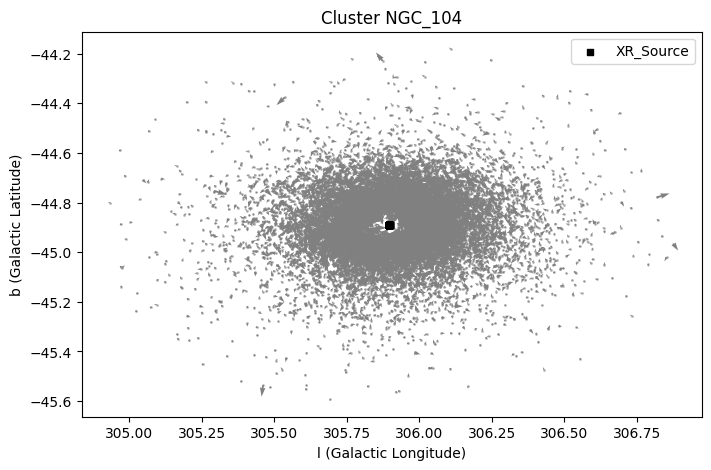

In [63]:
gc_object.plot_cluster(factor_size=12)

In [64]:
gc_object.clustering_results.gc[["pm_l", "pm_b"]].describe()

,pm_l,pm_b
count,11566.000000,11566.000000
mean,-5.579875,1.752356
std,0.354215,0.349787
min,-6.936288,0.392797
25%,-5.814586,1.516026
50%,-5.577365,1.754808
75%,-5.343876,1.992728
max,-4.081471,3.184622


In [65]:
gc_object.describe()

,parallax,pmra,pmdec,bp_rp,phot_g_mean_mag
count,11566.000000,11566.000000,11566.000000,11566.000000,11566.000000
mean,0.225043,5.250570,-2.573225,0.870686,16.930764
std,0.071443,0.357968,0.368055,0.128701,0.919598
min,0.000249,3.722795,-4.033533,0.698929,12.920740
25%,0.182762,5.009317,-2.833802,0.777972,16.904344
50%,0.225731,5.249115,-2.578001,0.806733,17.195404
75%,0.265881,5.488547,-2.311208,0.967632,17.477979
max,0.519351,6.665637,-1.286142,1.362946,18.071842


## Astro Data Radio 6

In [67]:
gc_object.clustering_results.gc["ipd_frac_multi_peak"].describe()

count    11566.000000
mean         0.607470
std          2.667314
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: ipd_frac_multi_peak, dtype: float64

In [ ]:
parallax_mean = gc_object.describe().loc["mean", "parallax"]
parallax_std = gc_object.describe().loc["std", "parallax"]


filters = FILTERS.copy()
FILTERS_R6 = {
#     "ipd_gof_har_amp": 0.15,
#     "ipd_frac_multi_peak": 10,
    "min_parallax": parallax_mean - 2 * parallax_std,
    "max_parallax": parallax_mean + 2 * parallax_std,
    "parallax_error": 0.30,
    "radial_velocity": 0,
}
filters.update(FILTERS_R6)

astrometric_data = AstroMetricData.load_data(
    name=CLUSTER_NAME,
    catalog_name=CATALOG,
    radius_scale=6,
    **filters
)

In [90]:
filters

{'ast_params_solved': 3,
 'ruwe': 1.4,
 'v_periods_used': 10,
 'min_parallax': np.float64(0.08215703589023918),
 'max_parallax': np.float64(0.3679293505156198),
 'parallax_error': 0.3,
 'radial_velocity': 0}

In [ ]:
print(astrometric_data)

In [82]:
cluster_pm = gc_object.clustering_results.gc["pm_kms"].mean()

data = astrometric_data.get_data("df_c2")

data.pm_kms

4    51.028232
Name: pm_kms, dtype: float64

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Cluster NGC_104'}, xlabel='l (Galactic Longitude)', ylabel='b (Galactic Latitude)'>)

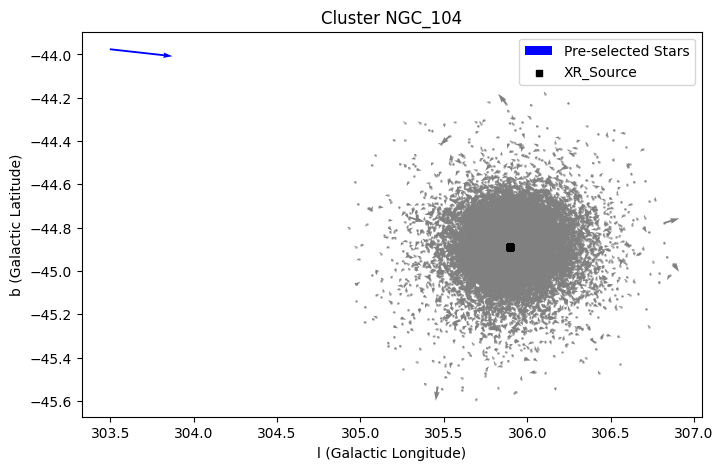

In [87]:
gc_object.plot_cluster(highlight_stars=data, factor_size=10)